# Imports

In [1]:
import numpy as np
import torch
import os
from matplotlib import pyplot as plt

from utils.image_helpers import plot_image_grid, get_images
from simulation.Simulation import Simulation
from utils.configuration_parser.gridsearch_configuration import get_gridsearch_configuration
from models.model_creation import create_model_from_parameter_combination
from fitting.Fitter import create_fitter_from_configuration
from utils.pickle_utils import save_gridsearch_result

GPU = True
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    os.environ['CUDA_VISIBLE_DEVICES'] = '3'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor

num GPUs 1


# Load Image

In [2]:
number_of_images_used = 20

Number of Images: 10000 in data/imagenet_v2_top_images


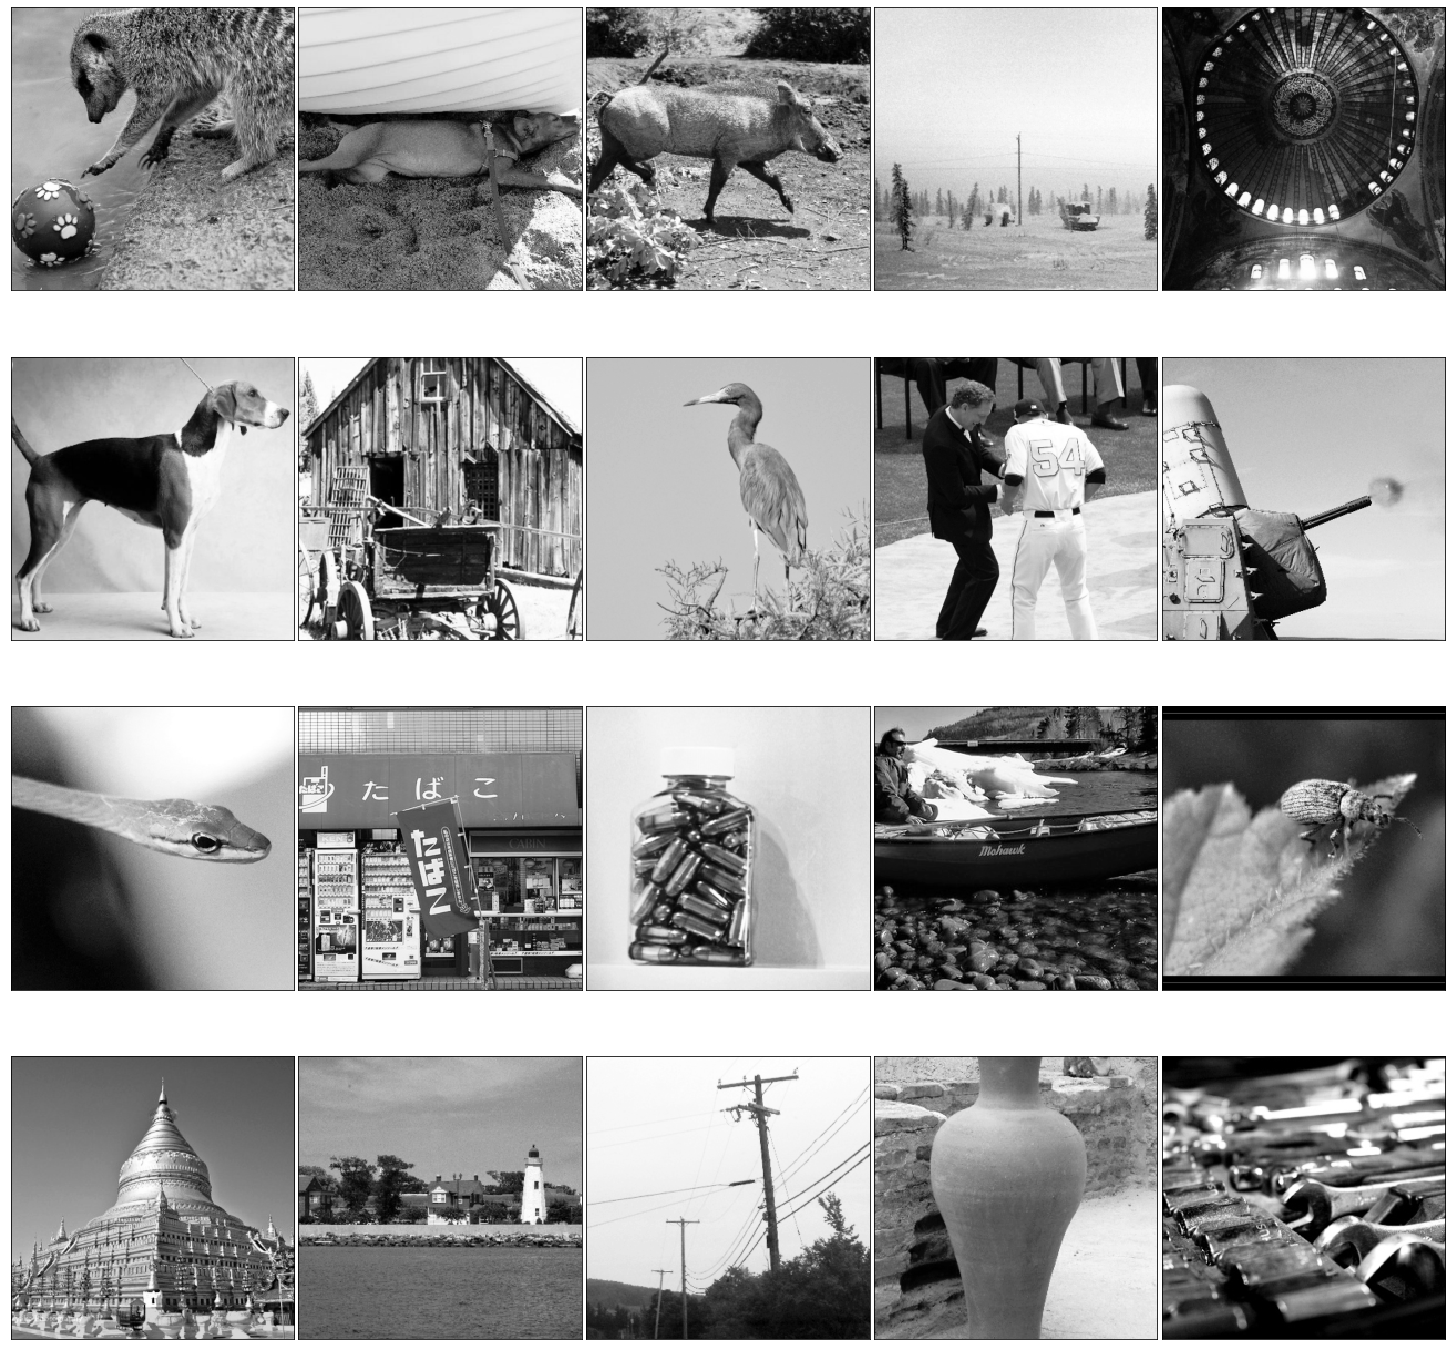

In [3]:
original_images = get_images('data/imagenet_v2_top_images', max_amount=number_of_images_used)
plot = plot_image_grid(original_images, ncols = 5)

# Gibbs Simulation

In [4]:
image_dimensions = original_images[0].shape
print(image_dimensions)
cropped_size = (100, 100)

(256, 256)


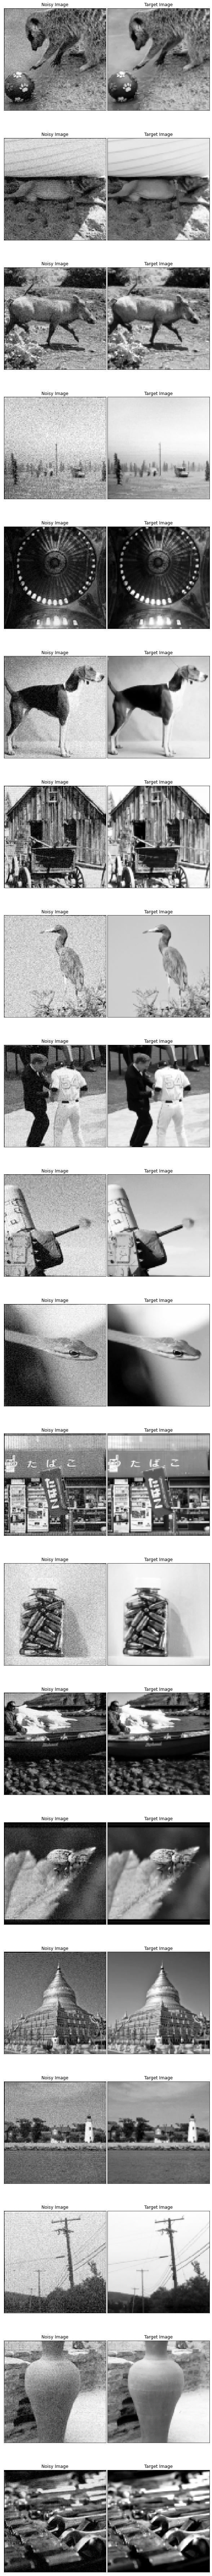

In [5]:
simulation = Simulation(input_size=image_dimensions, cropped_size=cropped_size, pf_factor=8, snr_range=(4,4))
noisy_images, target_images = simulation.simulate_list_of_images(original_images)

all_images = [x for row in zip(noisy_images, target_images) for x in row]
titles = ['Noisy Image', 'Target Image'] * len(noisy_images)
plot_image_grid(all_images, titles, ncols=2)
plt.show()

# Configuration

In [6]:
gridsearch_configuration = get_gridsearch_configuration()

gridsearch_configuration.model_types = ['deep']
gridsearch_configuration.input_shapes = [[16,16], [20, 20], [24, 24]]
gridsearch_configuration.numbers_of_hidden_channels = [32, 48, 64]
gridsearch_configuration.numbers_of_layers = [4, 5, 6, 7]
gridsearch_configuration.number_of_runs = 10
gridsearch_configuration.image_dimensions = list(cropped_size) + [1]

gridsearch_configuration.convergence_check_length = 1000
gridsearch_configuration.number_of_iterations = 3000
gridsearch_configuration.log_frequency = 100
gridsearch_configuration.save_losses = False
gridsearch_configuration.find_best = True

print(gridsearch_configuration)

image_dimensions: [100, 100, 1]  
result_path: data/results/2020-12-15-11:24-gridsearch.pkl  
model_types: ['deep']  
input_shapes: [[16, 16], [20, 20], [24, 24]]  
numbers_of_layers: [4, 5, 6, 7]  
numbers_of_hidden_channels: [32, 48, 64]  
number_of_runs: 10  
number_of_iterations: 3000  
learning_rate: 0.1  
convergence_check_length: 1000  
log_frequency: 100  
find_best: True  
save_losses: False  
constant_input: False  
data_type: <class 'torch.cuda.FloatTensor'>  



In [7]:
parameter_combinations = gridsearch_configuration.generate_parameter_combinations()
# for parameters in parameter_combinations:
    # print(parameters) 

# Fit all parameter combinations and save results

In [8]:
fitter = create_fitter_from_configuration(gridsearch_configuration)

In [ ]:
 for image_index, (noisy_image, target_image) in enumerate(zip(noisy_images, target_images)):
    for parameter_index, parameter_combination in enumerate(parameter_combinations):
        print(f'Image: {image_index+1}/{len(noisy_images)}, Parameter Combination: {parameter_index+1}/{len(parameter_combinations)}')
        print('+++' + str(parameter_combination) + '+++')
        model = create_model_from_parameter_combination(parameter_combination, noisy_image.shape)
        fitter(model, noisy_image, target_image)
        result = fitter.get_result()
        save_gridsearch_result(result, gridsearch_configuration.result_path)
        print('')

Image: 1/20, Parameter Combination: 1/360
+++('deep', [16, 16], 4, 32)+++
Step: 03000, Loss: 0.001832, Target Loss: 0.002050, Minimum Loss at: 2906 with 0.001804
Image: 1/20, Parameter Combination: 2/360
+++('deep', [16, 16], 4, 48)+++
Step: 03000, Loss: 0.002226, Target Loss: 0.002672, Minimum Loss at: 2803 with 0.001356
Image: 1/20, Parameter Combination: 3/360
+++('deep', [16, 16], 4, 64)+++
Step: 03000, Loss: 0.001149, Target Loss: 0.002151, Minimum Loss at: 2947 with 0.000940
Image: 1/20, Parameter Combination: 4/360
+++('deep', [16, 16], 5, 32)+++
Step: 03000, Loss: 0.001928, Target Loss: 0.002433, Minimum Loss at: 2954 with 0.001506
Image: 1/20, Parameter Combination: 5/360
+++('deep', [16, 16], 5, 48)+++
Step: 03000, Loss: 0.001122, Target Loss: 0.002189, Minimum Loss at: 2831 with 0.000940
Image: 1/20, Parameter Combination: 6/360
+++('deep', [16, 16], 5, 64)+++
Step: 03000, Loss: 0.002240, Target Loss: 0.003239, Minimum Loss at: 2990 with 0.000985
Image: 1/20, Parameter Combi

Step: 03000, Loss: 0.000805, Target Loss: 0.002080, Minimum Loss at: 2982 with 0.000637
Image: 1/20, Parameter Combination: 52/360
+++('deep', [20, 20], 5, 32)+++
Step: 03000, Loss: 0.001624, Target Loss: 0.002176, Minimum Loss at: 2854 with 0.001472
Image: 1/20, Parameter Combination: 53/360
+++('deep', [20, 20], 5, 48)+++
Step: 03000, Loss: 0.001028, Target Loss: 0.002065, Minimum Loss at: 2968 with 0.000976
Image: 1/20, Parameter Combination: 54/360
+++('deep', [20, 20], 5, 64)+++
Step: 03000, Loss: 0.000661, Target Loss: 0.002046, Minimum Loss at: 2961 with 0.000628
Image: 1/20, Parameter Combination: 55/360
+++('deep', [20, 20], 6, 32)+++
Step: 03000, Loss: 0.001520, Target Loss: 0.002040, Minimum Loss at: 2833 with 0.001370
Image: 1/20, Parameter Combination: 56/360
+++('deep', [20, 20], 6, 48)+++
Step: 03000, Loss: 0.000673, Target Loss: 0.002071, Minimum Loss at: 2999 with 0.000673
Image: 1/20, Parameter Combination: 57/360
+++('deep', [20, 20], 6, 64)+++
Step: 03000, Loss: 0.0

Step: 03000, Loss: 0.000767, Target Loss: 0.002066, Minimum Loss at: 2957 with 0.000656
Image: 1/20, Parameter Combination: 102/360
+++('deep', [24, 24], 5, 64)+++
Step: 03000, Loss: 0.000596, Target Loss: 0.002071, Minimum Loss at: 2967 with 0.000464
Image: 1/20, Parameter Combination: 103/360
+++('deep', [24, 24], 6, 32)+++
Step: 03000, Loss: 0.001267, Target Loss: 0.002101, Minimum Loss at: 2973 with 0.001201
Image: 1/20, Parameter Combination: 104/360
+++('deep', [24, 24], 6, 48)+++
Step: 03000, Loss: 0.001365, Target Loss: 0.002065, Minimum Loss at: 2379 with 0.000879
Image: 1/20, Parameter Combination: 105/360
+++('deep', [24, 24], 6, 64)+++
Step: 03000, Loss: 0.001012, Target Loss: 0.002609, Minimum Loss at: 2961 with 0.000512
Image: 1/20, Parameter Combination: 106/360
+++('deep', [24, 24], 7, 32)+++
Step: 03000, Loss: 0.001258, Target Loss: 0.002406, Minimum Loss at: 2967 with 0.000896
Image: 1/20, Parameter Combination: 107/360
+++('deep', [24, 24], 7, 48)+++
Step: 03000, Los

Step: 03000, Loss: 0.002005, Target Loss: 0.002382, Minimum Loss at: 2937 with 0.001475
Image: 1/20, Parameter Combination: 152/360
+++('deep', [16, 16], 6, 48)+++
Step: 03000, Loss: 0.001348, Target Loss: 0.002127, Minimum Loss at: 2980 with 0.000906
Image: 1/20, Parameter Combination: 153/360
+++('deep', [16, 16], 6, 64)+++
Step: 03000, Loss: 0.001000, Target Loss: 0.002064, Minimum Loss at: 2941 with 0.000838
Image: 1/20, Parameter Combination: 154/360
+++('deep', [16, 16], 7, 32)+++
Step: 03000, Loss: 0.001361, Target Loss: 0.002168, Minimum Loss at: 2995 with 0.001287
Image: 1/20, Parameter Combination: 155/360
+++('deep', [16, 16], 7, 48)+++
Step: 03000, Loss: 0.001090, Target Loss: 0.001994, Minimum Loss at: 2832 with 0.001034
Image: 1/20, Parameter Combination: 156/360
+++('deep', [16, 16], 7, 64)+++
Step: 03000, Loss: 0.002429, Target Loss: 0.003262, Minimum Loss at: 2915 with 0.001080
Image: 1/20, Parameter Combination: 157/360
+++('deep', [20, 20], 4, 32)+++
Step: 03000, Los

Step: 02900, Loss: 0.001561, Target Loss: 0.002134, Minimum Loss at: 1942 with 0.001061
Adam has converged at step 2943.

Image: 1/20, Parameter Combination: 202/360
+++('deep', [20, 20], 7, 32)+++
Step: 03000, Loss: 0.001630, Target Loss: 0.002351, Minimum Loss at: 2963 with 0.001315
Image: 1/20, Parameter Combination: 203/360
+++('deep', [20, 20], 7, 48)+++
Step: 03000, Loss: 0.001174, Target Loss: 0.002103, Minimum Loss at: 2965 with 0.001009
Image: 1/20, Parameter Combination: 204/360
+++('deep', [20, 20], 7, 64)+++
Step: 03000, Loss: 0.000550, Target Loss: 0.002157, Minimum Loss at: 2997 with 0.000522
Image: 1/20, Parameter Combination: 205/360
+++('deep', [24, 24], 4, 32)+++
Step: 03000, Loss: 0.001774, Target Loss: 0.002304, Minimum Loss at: 2878 with 0.001523
Image: 1/20, Parameter Combination: 206/360
+++('deep', [24, 24], 4, 48)+++
Step: 03000, Loss: 0.001030, Target Loss: 0.002060, Minimum Loss at: 2935 with 0.000951
Image: 1/20, Parameter Combination: 207/360
+++('deep', [2

Step: 03000, Loss: 0.000807, Target Loss: 0.002055, Minimum Loss at: 2948 with 0.000646
Image: 1/20, Parameter Combination: 252/360
+++('deep', [24, 24], 7, 64)+++
Step: 03000, Loss: 0.000992, Target Loss: 0.002331, Minimum Loss at: 2947 with 0.000561
Image: 1/20, Parameter Combination: 253/360
+++('deep', [16, 16], 4, 32)+++
Step: 03000, Loss: 0.001968, Target Loss: 0.002196, Minimum Loss at: 2928 with 0.001588
Image: 1/20, Parameter Combination: 254/360
+++('deep', [16, 16], 4, 48)+++
Step: 03000, Loss: 0.001285, Target Loss: 0.002031, Minimum Loss at: 2998 with 0.001282
Image: 1/20, Parameter Combination: 255/360
+++('deep', [16, 16], 4, 64)+++
Step: 03000, Loss: 0.002311, Target Loss: 0.002454, Minimum Loss at: 2988 with 0.001673
Image: 1/20, Parameter Combination: 256/360
+++('deep', [16, 16], 5, 32)+++
Step: 03000, Loss: 0.001805, Target Loss: 0.002109, Minimum Loss at: 2947 with 0.001655
Image: 1/20, Parameter Combination: 257/360
+++('deep', [16, 16], 5, 48)+++
Step: 03000, Los

Step: 03000, Loss: 0.001844, Target Loss: 0.002218, Minimum Loss at: 2983 with 0.001540
Image: 1/20, Parameter Combination: 302/360
+++('deep', [20, 20], 4, 48)+++
Step: 03000, Loss: 0.001059, Target Loss: 0.002117, Minimum Loss at: 2920 with 0.000963
Image: 1/20, Parameter Combination: 303/360
+++('deep', [20, 20], 4, 64)+++
Step: 03000, Loss: 0.000780, Target Loss: 0.001958, Minimum Loss at: 2933 with 0.000736
Image: 1/20, Parameter Combination: 304/360
+++('deep', [20, 20], 5, 32)+++
Step: 03000, Loss: 0.001664, Target Loss: 0.002254, Minimum Loss at: 2710 with 0.001470
Image: 1/20, Parameter Combination: 305/360
+++('deep', [20, 20], 5, 48)+++
Step: 03000, Loss: 0.001445, Target Loss: 0.002238, Minimum Loss at: 2989 with 0.000991
Image: 1/20, Parameter Combination: 306/360
+++('deep', [20, 20], 5, 64)+++
Step: 03000, Loss: 0.001055, Target Loss: 0.002344, Minimum Loss at: 2988 with 0.000473
Image: 1/20, Parameter Combination: 307/360
+++('deep', [20, 20], 6, 32)+++
Step: 03000, Los

Step: 03000, Loss: 0.000804, Target Loss: 0.002057, Minimum Loss at: 2924 with 0.000799
Image: 1/20, Parameter Combination: 352/360
+++('deep', [24, 24], 5, 32)+++
Step: 03000, Loss: 0.001415, Target Loss: 0.002091, Minimum Loss at: 2862 with 0.001344
Image: 1/20, Parameter Combination: 353/360
+++('deep', [24, 24], 5, 48)+++
Step: 03000, Loss: 0.000628, Target Loss: 0.002102, Minimum Loss at: 2944 with 0.000613
Image: 1/20, Parameter Combination: 354/360
+++('deep', [24, 24], 5, 64)+++
Step: 03000, Loss: 0.000804, Target Loss: 0.002094, Minimum Loss at: 2857 with 0.000785
Image: 1/20, Parameter Combination: 355/360
+++('deep', [24, 24], 6, 32)+++
Step: 03000, Loss: 0.001279, Target Loss: 0.002154, Minimum Loss at: 2871 with 0.001176
Image: 1/20, Parameter Combination: 356/360
+++('deep', [24, 24], 6, 48)+++
Step: 03000, Loss: 0.001371, Target Loss: 0.002538, Minimum Loss at: 2988 with 0.000575
Image: 1/20, Parameter Combination: 357/360
+++('deep', [24, 24], 6, 64)+++
Step: 03000, Los

Step: 03000, Loss: 0.000904, Target Loss: 0.001595, Minimum Loss at: 2956 with 0.000866
Image: 2/20, Parameter Combination: 42/360
+++('deep', [16, 16], 5, 64)+++
Step: 03000, Loss: 0.001246, Target Loss: 0.001807, Minimum Loss at: 2880 with 0.000902
Image: 2/20, Parameter Combination: 43/360
+++('deep', [16, 16], 6, 32)+++
Step: 03000, Loss: 0.001499, Target Loss: 0.001515, Minimum Loss at: 2948 with 0.001245
Image: 2/20, Parameter Combination: 44/360
+++('deep', [16, 16], 6, 48)+++
Step: 03000, Loss: 0.001463, Target Loss: 0.001741, Minimum Loss at: 2982 with 0.000923
Image: 2/20, Parameter Combination: 45/360
+++('deep', [16, 16], 6, 64)+++
Step: 03000, Loss: 0.001469, Target Loss: 0.002181, Minimum Loss at: 2954 with 0.000840
Image: 2/20, Parameter Combination: 46/360
+++('deep', [16, 16], 7, 32)+++
Step: 03000, Loss: 0.001199, Target Loss: 0.001594, Minimum Loss at: 2909 with 0.001053
Image: 2/20, Parameter Combination: 47/360
+++('deep', [16, 16], 7, 48)+++
Step: 03000, Loss: 0.0

Step: 03000, Loss: 0.001735, Target Loss: 0.002326, Minimum Loss at: 2780 with 0.000915
Image: 2/20, Parameter Combination: 92/360
+++('deep', [20, 20], 6, 48)+++
Step: 03000, Loss: 0.001029, Target Loss: 0.001872, Minimum Loss at: 2956 with 0.000739
Image: 2/20, Parameter Combination: 93/360
+++('deep', [20, 20], 6, 64)+++
Step: 03000, Loss: 0.000602, Target Loss: 0.001726, Minimum Loss at: 2850 with 0.000578
Image: 2/20, Parameter Combination: 94/360
+++('deep', [20, 20], 7, 32)+++
Step: 03000, Loss: 0.001256, Target Loss: 0.001569, Minimum Loss at: 2967 with 0.001119
Image: 2/20, Parameter Combination: 95/360
+++('deep', [20, 20], 7, 48)+++
Step: 03000, Loss: 0.001089, Target Loss: 0.001882, Minimum Loss at: 2918 with 0.000657
Image: 2/20, Parameter Combination: 96/360
+++('deep', [20, 20], 7, 64)+++
Step: 03000, Loss: 0.002043, Target Loss: 0.002830, Minimum Loss at: 2915 with 0.000750
Image: 2/20, Parameter Combination: 97/360
+++('deep', [24, 24], 4, 32)+++
Step: 03000, Loss: 0.0

Step: 03000, Loss: 0.000799, Target Loss: 0.001974, Minimum Loss at: 2981 with 0.000540
Image: 2/20, Parameter Combination: 142/360
+++('deep', [24, 24], 7, 32)+++
Step: 03000, Loss: 0.001173, Target Loss: 0.001744, Minimum Loss at: 2798 with 0.000817
Image: 2/20, Parameter Combination: 143/360
+++('deep', [24, 24], 7, 48)+++
Step: 03000, Loss: 0.000595, Target Loss: 0.001700, Minimum Loss at: 2971 with 0.000557
Image: 2/20, Parameter Combination: 144/360
+++('deep', [24, 24], 7, 64)+++
Step: 03000, Loss: 0.000639, Target Loss: 0.001759, Minimum Loss at: 2970 with 0.000619
Image: 2/20, Parameter Combination: 145/360
+++('deep', [16, 16], 4, 32)+++
Step: 03000, Loss: 0.001669, Target Loss: 0.001885, Minimum Loss at: 2762 with 0.001339
Image: 2/20, Parameter Combination: 146/360
+++('deep', [16, 16], 4, 48)+++
Step: 03000, Loss: 0.001254, Target Loss: 0.001775, Minimum Loss at: 2774 with 0.000877
Image: 2/20, Parameter Combination: 147/360
+++('deep', [16, 16], 4, 64)+++
Step: 03000, Los

Step: 03000, Loss: 0.001083, Target Loss: 0.001722, Minimum Loss at: 2950 with 0.000913
Image: 2/20, Parameter Combination: 192/360
+++('deep', [16, 16], 7, 64)+++
Step: 03000, Loss: 0.000849, Target Loss: 0.001628, Minimum Loss at: 2972 with 0.000662
Image: 2/20, Parameter Combination: 193/360
+++('deep', [20, 20], 4, 32)+++
Step: 03000, Loss: 0.001387, Target Loss: 0.001680, Minimum Loss at: 2949 with 0.001217
Image: 2/20, Parameter Combination: 194/360
+++('deep', [20, 20], 4, 48)+++
Step: 03000, Loss: 0.000887, Target Loss: 0.001626, Minimum Loss at: 2935 with 0.000882
Image: 2/20, Parameter Combination: 195/360
+++('deep', [20, 20], 4, 64)+++
Step: 03000, Loss: 0.001397, Target Loss: 0.001919, Minimum Loss at: 2987 with 0.000966
Image: 2/20, Parameter Combination: 196/360
+++('deep', [20, 20], 5, 32)+++
Step: 03000, Loss: 0.001543, Target Loss: 0.002165, Minimum Loss at: 2991 with 0.001057
Image: 2/20, Parameter Combination: 197/360
+++('deep', [20, 20], 5, 48)+++
Step: 03000, Los

Step: 03000, Loss: 0.001340, Target Loss: 0.001789, Minimum Loss at: 2894 with 0.001144
Image: 2/20, Parameter Combination: 242/360
+++('deep', [24, 24], 4, 48)+++
Step: 03000, Loss: 0.000653, Target Loss: 0.001663, Minimum Loss at: 2954 with 0.000576
Image: 2/20, Parameter Combination: 243/360
+++('deep', [24, 24], 4, 64)+++
Step: 03000, Loss: 0.000603, Target Loss: 0.001736, Minimum Loss at: 2861 with 0.000597
Image: 2/20, Parameter Combination: 244/360
+++('deep', [24, 24], 5, 32)+++
Step: 03000, Loss: 0.001297, Target Loss: 0.001908, Minimum Loss at: 2950 with 0.000951
Image: 2/20, Parameter Combination: 245/360
+++('deep', [24, 24], 5, 48)+++
Step: 03000, Loss: 0.000749, Target Loss: 0.001724, Minimum Loss at: 2971 with 0.000671
Image: 2/20, Parameter Combination: 246/360
+++('deep', [24, 24], 5, 64)+++
Step: 03000, Loss: 0.000486, Target Loss: 0.001744, Minimum Loss at: 2939 with 0.000460
Image: 2/20, Parameter Combination: 247/360
+++('deep', [24, 24], 6, 32)+++
Step: 03000, Los

Step: 03000, Loss: 0.000997, Target Loss: 0.001642, Minimum Loss at: 2996 with 0.000980
Image: 2/20, Parameter Combination: 292/360
+++('deep', [16, 16], 5, 32)+++
Step: 03000, Loss: 0.002270, Target Loss: 0.002312, Minimum Loss at: 2988 with 0.001127
Image: 2/20, Parameter Combination: 293/360
+++('deep', [16, 16], 5, 48)+++
Step: 03000, Loss: 0.001027, Target Loss: 0.001544, Minimum Loss at: 2892 with 0.000949
Image: 2/20, Parameter Combination: 294/360
+++('deep', [16, 16], 5, 64)+++
Step: 03000, Loss: 0.000804, Target Loss: 0.001623, Minimum Loss at: 2858 with 0.000790
Image: 2/20, Parameter Combination: 295/360
+++('deep', [16, 16], 6, 32)+++
Step: 03000, Loss: 0.001326, Target Loss: 0.001734, Minimum Loss at: 2957 with 0.001180
Image: 2/20, Parameter Combination: 296/360
+++('deep', [16, 16], 6, 48)+++
Step: 03000, Loss: 0.001121, Target Loss: 0.001748, Minimum Loss at: 2876 with 0.000863
Image: 2/20, Parameter Combination: 297/360
+++('deep', [16, 16], 6, 64)+++
Step: 03000, Los

Step: 03000, Loss: 0.002123, Target Loss: 0.002918, Minimum Loss at: 2841 with 0.000796
Image: 2/20, Parameter Combination: 342/360
+++('deep', [20, 20], 5, 64)+++
Step: 03000, Loss: 0.000806, Target Loss: 0.001724, Minimum Loss at: 2852 with 0.000742
Image: 2/20, Parameter Combination: 343/360
+++('deep', [20, 20], 6, 32)+++
Step: 03000, Loss: 0.001652, Target Loss: 0.001919, Minimum Loss at: 2983 with 0.001046
Image: 2/20, Parameter Combination: 344/360
+++('deep', [20, 20], 6, 48)+++
Step: 03000, Loss: 0.000766, Target Loss: 0.001672, Minimum Loss at: 2966 with 0.000741
Image: 2/20, Parameter Combination: 345/360
+++('deep', [20, 20], 6, 64)+++
Step: 03000, Loss: 0.000846, Target Loss: 0.001690, Minimum Loss at: 2918 with 0.000785
Image: 2/20, Parameter Combination: 346/360
+++('deep', [20, 20], 7, 32)+++
Step: 03000, Loss: 0.001093, Target Loss: 0.001648, Minimum Loss at: 2842 with 0.001016
Image: 2/20, Parameter Combination: 347/360
+++('deep', [20, 20], 7, 48)+++
Step: 03000, Los

Step: 03000, Loss: 0.001303, Target Loss: 0.002893, Minimum Loss at: 2995 with 0.001198
Image: 3/20, Parameter Combination: 32/360
+++('deep', [24, 24], 6, 48)+++
Step: 03000, Loss: 0.000664, Target Loss: 0.002791, Minimum Loss at: 2814 with 0.000636
Image: 3/20, Parameter Combination: 33/360
+++('deep', [24, 24], 6, 64)+++
Step: 03000, Loss: 0.000990, Target Loss: 0.002919, Minimum Loss at: 2907 with 0.000527
Image: 3/20, Parameter Combination: 34/360
+++('deep', [24, 24], 7, 32)+++
Step: 03000, Loss: 0.001741, Target Loss: 0.002847, Minimum Loss at: 2941 with 0.001496
Image: 3/20, Parameter Combination: 35/360
+++('deep', [24, 24], 7, 48)+++
Step: 03000, Loss: 0.001425, Target Loss: 0.002965, Minimum Loss at: 2984 with 0.000696
Image: 3/20, Parameter Combination: 36/360
+++('deep', [24, 24], 7, 64)+++
Step: 03000, Loss: 0.000871, Target Loss: 0.003162, Minimum Loss at: 2888 with 0.000492
Image: 3/20, Parameter Combination: 37/360
+++('deep', [16, 16], 4, 32)+++
Step: 03000, Loss: 0.0

Step: 03000, Loss: 0.001473, Target Loss: 0.003168, Minimum Loss at: 2860 with 0.000913
Image: 3/20, Parameter Combination: 82/360
+++('deep', [16, 16], 7, 32)+++
Step: 03000, Loss: 0.001574, Target Loss: 0.002756, Minimum Loss at: 2963 with 0.001490
Image: 3/20, Parameter Combination: 83/360
+++('deep', [16, 16], 7, 48)+++
Step: 03000, Loss: 0.001397, Target Loss: 0.002782, Minimum Loss at: 2974 with 0.001042
Image: 3/20, Parameter Combination: 84/360
+++('deep', [16, 16], 7, 64)+++
Step: 03000, Loss: 0.001066, Target Loss: 0.002637, Minimum Loss at: 2963 with 0.000927
Image: 3/20, Parameter Combination: 85/360
+++('deep', [20, 20], 4, 32)+++
Step: 03000, Loss: 0.002552, Target Loss: 0.003291, Minimum Loss at: 2953 with 0.001928
Image: 3/20, Parameter Combination: 86/360
+++('deep', [20, 20], 4, 48)+++
Step: 03000, Loss: 0.001390, Target Loss: 0.002790, Minimum Loss at: 2972 with 0.000942
Image: 3/20, Parameter Combination: 87/360
+++('deep', [20, 20], 4, 64)+++
Step: 03000, Loss: 0.0

Step: 03000, Loss: 0.002582, Target Loss: 0.003765, Minimum Loss at: 2989 with 0.000919
Image: 3/20, Parameter Combination: 132/360
+++('deep', [20, 20], 7, 64)+++
Step: 03000, Loss: 0.000695, Target Loss: 0.002793, Minimum Loss at: 2937 with 0.000619
Image: 3/20, Parameter Combination: 133/360
+++('deep', [24, 24], 4, 32)+++
Step: 03000, Loss: 0.002150, Target Loss: 0.002916, Minimum Loss at: 2923 with 0.001958
Image: 3/20, Parameter Combination: 134/360
+++('deep', [24, 24], 4, 48)+++
Step: 03000, Loss: 0.001103, Target Loss: 0.002934, Minimum Loss at: 2856 with 0.000757
Image: 3/20, Parameter Combination: 135/360
+++('deep', [24, 24], 4, 64)+++
Step: 03000, Loss: 0.003065, Target Loss: 0.004428, Minimum Loss at: 2985 with 0.000919
Image: 3/20, Parameter Combination: 136/360
+++('deep', [24, 24], 5, 32)+++
Step: 03000, Loss: 0.001814, Target Loss: 0.002887, Minimum Loss at: 2892 with 0.001662
Image: 3/20, Parameter Combination: 137/360
+++('deep', [24, 24], 5, 48)+++
Step: 03000, Los

Step: 03000, Loss: 0.002532, Target Loss: 0.002910, Minimum Loss at: 2909 with 0.002307
Image: 3/20, Parameter Combination: 182/360
+++('deep', [16, 16], 4, 48)+++
Step: 03000, Loss: 0.001713, Target Loss: 0.002833, Minimum Loss at: 2905 with 0.001394
Image: 3/20, Parameter Combination: 183/360
+++('deep', [16, 16], 4, 64)+++
Step: 03000, Loss: 0.001097, Target Loss: 0.002710, Minimum Loss at: 2953 with 0.001051
Image: 3/20, Parameter Combination: 184/360
+++('deep', [16, 16], 5, 32)+++
Step: 03000, Loss: 0.002045, Target Loss: 0.002713, Minimum Loss at: 2707 with 0.001965
Image: 3/20, Parameter Combination: 185/360
+++('deep', [16, 16], 5, 48)+++
Step: 03000, Loss: 0.001379, Target Loss: 0.002731, Minimum Loss at: 2926 with 0.001093
Image: 3/20, Parameter Combination: 186/360
+++('deep', [16, 16], 5, 64)+++
Step: 03000, Loss: 0.001362, Target Loss: 0.002600, Minimum Loss at: 2968 with 0.001145
Image: 3/20, Parameter Combination: 187/360
+++('deep', [16, 16], 6, 32)+++
Step: 03000, Los

Step: 03000, Loss: 0.000920, Target Loss: 0.002716, Minimum Loss at: 2867 with 0.000904
Image: 3/20, Parameter Combination: 232/360
+++('deep', [20, 20], 5, 32)+++
Step: 03000, Loss: 0.001757, Target Loss: 0.002872, Minimum Loss at: 2856 with 0.001575
Image: 3/20, Parameter Combination: 233/360
+++('deep', [20, 20], 5, 48)+++
Step: 03000, Loss: 0.001160, Target Loss: 0.002794, Minimum Loss at: 2958 with 0.001102
Image: 3/20, Parameter Combination: 234/360
+++('deep', [20, 20], 5, 64)+++
Step: 03000, Loss: 0.000652, Target Loss: 0.002754, Minimum Loss at: 2915 with 0.000574
Image: 3/20, Parameter Combination: 235/360
+++('deep', [20, 20], 6, 32)+++
Step: 03000, Loss: 0.001506, Target Loss: 0.002729, Minimum Loss at: 2934 with 0.001363
Image: 3/20, Parameter Combination: 236/360
+++('deep', [20, 20], 6, 48)+++
Step: 03000, Loss: 0.001656, Target Loss: 0.003272, Minimum Loss at: 2867 with 0.000840
Image: 3/20, Parameter Combination: 237/360
+++('deep', [20, 20], 6, 64)+++
Step: 03000, Los

Step: 03000, Loss: 0.000818, Target Loss: 0.002650, Minimum Loss at: 2957 with 0.000602
Image: 3/20, Parameter Combination: 282/360
+++('deep', [24, 24], 5, 64)+++
Step: 03000, Loss: 0.001453, Target Loss: 0.003219, Minimum Loss at: 2986 with 0.000525
Image: 3/20, Parameter Combination: 283/360
+++('deep', [24, 24], 6, 32)+++
Step: 03000, Loss: 0.001671, Target Loss: 0.002883, Minimum Loss at: 2785 with 0.001403
Image: 3/20, Parameter Combination: 284/360
+++('deep', [24, 24], 6, 48)+++
Step: 03000, Loss: 0.001703, Target Loss: 0.003724, Minimum Loss at: 2909 with 0.000690
Image: 3/20, Parameter Combination: 285/360
+++('deep', [24, 24], 6, 64)+++
Step: 03000, Loss: 0.001031, Target Loss: 0.003370, Minimum Loss at: 2919 with 0.000411
Image: 3/20, Parameter Combination: 286/360
+++('deep', [24, 24], 7, 32)+++
Step: 03000, Loss: 0.002165, Target Loss: 0.003224, Minimum Loss at: 2984 with 0.001203
Image: 3/20, Parameter Combination: 287/360
+++('deep', [24, 24], 7, 48)+++
Step: 03000, Los

Step: 03000, Loss: 0.001870, Target Loss: 0.002825, Minimum Loss at: 2966 with 0.001697
Image: 3/20, Parameter Combination: 332/360
+++('deep', [16, 16], 6, 48)+++
Step: 03000, Loss: 0.001313, Target Loss: 0.002670, Minimum Loss at: 2975 with 0.001119
Image: 3/20, Parameter Combination: 333/360
+++('deep', [16, 16], 6, 64)+++
Step: 03000, Loss: 0.001472, Target Loss: 0.002908, Minimum Loss at: 2918 with 0.000890
Image: 3/20, Parameter Combination: 334/360
+++('deep', [16, 16], 7, 32)+++
Step: 03000, Loss: 0.001892, Target Loss: 0.002793, Minimum Loss at: 2817 with 0.001749
Image: 3/20, Parameter Combination: 335/360
+++('deep', [16, 16], 7, 48)+++
Step: 03000, Loss: 0.001227, Target Loss: 0.002750, Minimum Loss at: 2874 with 0.001214
Image: 3/20, Parameter Combination: 336/360
+++('deep', [16, 16], 7, 64)+++
Step: 03000, Loss: 0.002133, Target Loss: 0.003547, Minimum Loss at: 2991 with 0.001208
Image: 3/20, Parameter Combination: 337/360
+++('deep', [20, 20], 4, 32)+++
Step: 03000, Los

Step: 03000, Loss: 0.000805, Target Loss: 0.001428, Minimum Loss at: 2893 with 0.000803
Image: 4/20, Parameter Combination: 22/360
+++('deep', [20, 20], 7, 32)+++
Step: 03000, Loss: 0.001343, Target Loss: 0.001075, Minimum Loss at: 2996 with 0.001315
Image: 4/20, Parameter Combination: 23/360
+++('deep', [20, 20], 7, 48)+++
Step: 03000, Loss: 0.000978, Target Loss: 0.001379, Minimum Loss at: 2949 with 0.000850
Image: 4/20, Parameter Combination: 24/360
+++('deep', [20, 20], 7, 64)+++
Step: 03000, Loss: 0.001077, Target Loss: 0.001256, Minimum Loss at: 2974 with 0.001011
Image: 4/20, Parameter Combination: 25/360
+++('deep', [24, 24], 4, 32)+++
Step: 03000, Loss: 0.001324, Target Loss: 0.001106, Minimum Loss at: 2999 with 0.001324
Image: 4/20, Parameter Combination: 26/360
+++('deep', [24, 24], 4, 48)+++
Step: 03000, Loss: 0.001132, Target Loss: 0.001590, Minimum Loss at: 2986 with 0.000843
Image: 4/20, Parameter Combination: 27/360
+++('deep', [24, 24], 4, 64)+++
Step: 03000, Loss: 0.0

Step: 03000, Loss: 0.000751, Target Loss: 0.001496, Minimum Loss at: 2972 with 0.000650
Image: 4/20, Parameter Combination: 72/360
+++('deep', [24, 24], 7, 64)+++
Step: 03000, Loss: 0.001090, Target Loss: 0.001364, Minimum Loss at: 2960 with 0.000930
Image: 4/20, Parameter Combination: 73/360
+++('deep', [16, 16], 4, 32)+++
Step: 03000, Loss: 0.001370, Target Loss: 0.001083, Minimum Loss at: 2966 with 0.001346
Image: 4/20, Parameter Combination: 74/360
+++('deep', [16, 16], 4, 48)+++
Step: 03000, Loss: 0.001730, Target Loss: 0.001851, Minimum Loss at: 2987 with 0.000952
Image: 4/20, Parameter Combination: 75/360
+++('deep', [16, 16], 4, 64)+++
Step: 03000, Loss: 0.001219, Target Loss: 0.001401, Minimum Loss at: 2991 with 0.001059
Image: 4/20, Parameter Combination: 76/360
+++('deep', [16, 16], 5, 32)+++
Step: 03000, Loss: 0.001392, Target Loss: 0.000994, Minimum Loss at: 2884 with 0.001357
Image: 4/20, Parameter Combination: 77/360
+++('deep', [16, 16], 5, 48)+++
Step: 03000, Loss: 0.0